# TITANIC: Wrangling the Passenger Manifest

## Exploratory Analysis with Pandas

This tutorial is based on the Kaggle Competition,
"Predicting Survival Aboard the Titanic"
https://www.kaggle.com/c/titanic

___Be sure to read the README before you begin!___

See also:    
http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/    
http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql
import sqlite3 as sql

%matplotlib inline

Here's a ```sqlite``` database for you to store the data once it's ready:

In [2]:
con = sql.connect("titanic.db") 

__=>YOUR  TURN!__

Use ```pandas``` to open up the csv.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [3]:
df = pd.read_csv("../titanic/data/train.csv") 

### Exploring the Tabular Data

The file we'll be exploring today, ```train.csv```, is the training set -- it represents
a subset of the full passenger manifest dataset. The rest of the data is in another
file called ```test.csv``` - we'll use that later (when we get to Machine Learning).
Let's take a look...

__=>YOUR  TURN!__

Use ```pandas``` to view the "head" of the file with the first 10 rows.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


__What do you see?__
    - Are there any missing values?
    - What kinds of values/numbers/text are there?
    - Are the values continuous or categorical?
    - Are some variables more sparse than others?
    - Are there multiple values in a single column?

__=>YOUR  TURN!__

Use ```pandas``` to run summary statistics on the data.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__What can we infer from the summary statistics?__
    - How many missing values does the 'Age' column have?
    - What's the age distribution?
    - What percent of the passengers survived?
    - How many passengers belonged to Class 3?
    - Are there any outliers in the 'Fare' column?

__=>YOUR  TURN!__

Use ```pandas``` to get the median for the Age column.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

In [6]:
df['Age'].median()

28.0

__=>YOUR  TURN!__

Use ```pandas``` to find the number of unique values in the Ticket column.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html

In [7]:
df['Ticket'].nunique()

681

In [8]:
df['Ticket'].value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
347088                6
CA 2144               6
S.O.C. 14879          5
382652                5
113781                4
LINE                  4
349909                4
17421                 4
PC 17757              4
113760                4
W./C. 6608            4
19950                 4
347077                4
4133                  4
2666                  4
248727                3
PC 17572              3
24160                 3
C.A. 31921            3
110152                3
SC/Paris 2123         3
230080                3
13502                 3
PC 17755              3
239853                3
29106                 3
                     ..
4134                  1
315089                1
370369                1
113028                1
394140                1
350417                1
SC/PARIS 2146         1
PC 17585              1
350043                1
36963                 1
349224          

### Visually Exploring the Data

Let's look at a histogram of the age distribution.
What can you tell from the graph?

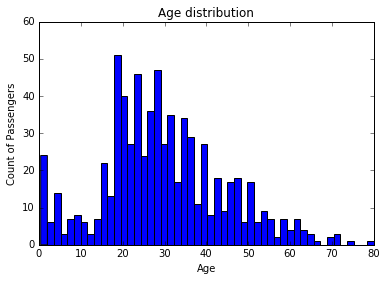

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 50, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

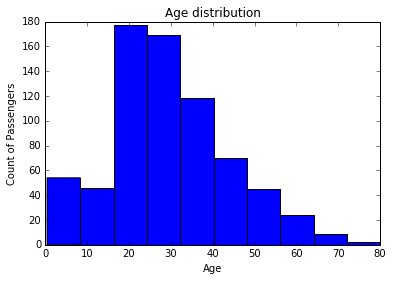

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

Now let's look at a histogram of the fares.
What does it tell you?

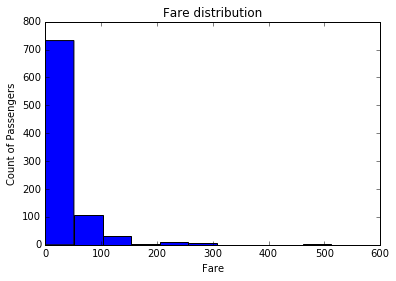

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()


### Dealing with Missing Values

Part of data wrangling is figuring out how to deal with missing values.
But before you decide, think about which variables are likely to be predictive
of survival. Which ones do you think will be the best predictors?

__Age__
Age is likely to play a role, so we'll probably want to estimate or 'impute'
the missing values in some way.

__Fare__
There are a lot of extremes on the high end and low end for ticket fares.
How should we handle them?

__Other Variables__
What do YOU think??

__=>YOUR  TURN!__

Use ```pandas``` to get the sum of all the null values in the Cabin column.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html

In [12]:
sum(df['Cabin'].isnull()) 

687

__=>YOUR  TURN!__

Use ```pandas``` to drop the Ticket column.

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [13]:
df = df.drop(['Ticket'], axis=1)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


__=>YOUR  TURN!__

Use ```pandas``` to calculate the mean age and fill all the null values in the Age column with that number..

Read the documentation to find out how:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html     
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

In [14]:
mean_age = np.mean(df.Age)
df.Age = df.Age.fillna(mean_age)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C


### Save Your Work
...you will need it in a few weeks!

__=>YOUR  TURN!__

Use ```pandas``` to write your dataframe to our sqlite database.

Read the documentation to find out how:   
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html

In [15]:
pd_sql.to_sql(df, "training_data", con) 